## Integrantes

### Jose Acosta - 27.738.080
### Gloria Sanchez - 29.624.990
### Mary Gomez - 30.334.762

# Trabajo de Estadística Matemáticas

*   Fecha de entrega: 06/12/2024.

El archivo data.csv incluye un número de ejemplos de beneficiarios inscritos en un plan de seguro indicando las características del paciente, así como el total de gastos médicos cargados (charges) al plan para el año calendario.

Las características son:

* Edad (age): un número entero que indica la edad del beneficiario principal (excluyendo los mayores de 64 años, ya que generalmente están cubiertos por el gobierno de Estados Unidos).

* Sexo (sex): el sexo del titular de la póliza, ya sea masculino o femenino.

* Bmi: el índice de masa corporal. El bmi es igual al peso (en kilogramos) divididos por altura (en metros) al cuadrado. Un bmi ideal está en un rango de 18.5 a 24.9.

* Hijos (children): un número entero que indica el número de hijos dependientes cubiertos por el plan de seguro.

* Fumador (smoker): una variable categórica que indica si el asegurado fuma regularmente.
* Región: el lugar de residencia del beneficiario en los Estados Unidos, dividido en cuatro regiones geográficas: noreste, sureste, suroeste o noroeste.

Observe que estas variables pueden estar relacionadas con las facturas de gastos médicos. Por
ejemplo, podríamos esperar que las personas mayores y los fumadores estén en mayor riesgo de
grandes gastos médicos.

## 1. Realice una exploración sobre los datos (estadísticas descriptivas).

In [19]:
## Escriba aquí su repuesta

## 2. Calcule la relación entre las variables (matriz de correlaciones).

In [20]:
## Escriba aquí su repuesta

## 3. Visualice la relación entre las variables (gráficos).

In [21]:
## Escriba aquí su repuesta

## 4. Contraste la hipótesis de que en las 4 regiones se tiene en promedio el mismo índice de masa corporal bmi (Análisis de varianzas).

In [22]:
# Importar librerías
import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
from tabulate import tabulate

# Cargar los datos
datos = pd.read_csv("./src/datos_.csv")

# Realizar el ANOVA
modelo = sm.ols("bmi ~ region", data=datos).fit()
anova_tabla = anova_lm(modelo, typ=2)

anova_tabla = anova_tabla.fillna(0)

# Imprimir la tabla con título
print("\nResultados:\n")
tabla_formateada = tabulate(anova_tabla, headers="keys", tablefmt="psql")
print(tabla_formateada)

# Interpretar los resultados
valor_p = anova_tabla.iloc[0]["PR(>F)"]
nivel_significancia = 0.05

if valor_p < nivel_significancia:
    print("\nSe rechaza la hipótesis nula.")
    print(
        "Existe evidencia estadísticamente significativa para afirmar que el promedio de bmi no es igual en las cuatro regiones."
    )
else:
    print("\nNo se rechaza la hipótesis nula.")
    print(
        "No hay suficiente evidencia para afirmar que el promedio de bmi es diferente entre las regiones."
    )


Resultados:

+----------+----------+------+---------+------------+
|          |   sum_sq |   df |       F |     PR(>F) |
|----------+----------+------+---------+------------|
| region   |  4057.85 |    3 | 39.5132 | 1.8357e-24 |
| Residual | 45665.5  | 1334 |  0      | 0          |
+----------+----------+------+---------+------------+

Se rechaza la hipótesis nula.
Existe evidencia estadísticamente significativa para afirmar que el promedio de bmi no es igual en las cuatro regiones.


## 5. Obtenga un modelo lineal que pueda predecir el total de gastos médicos cargados para un beneficiario.

Gastos médicos calculados: 4030.289356494026



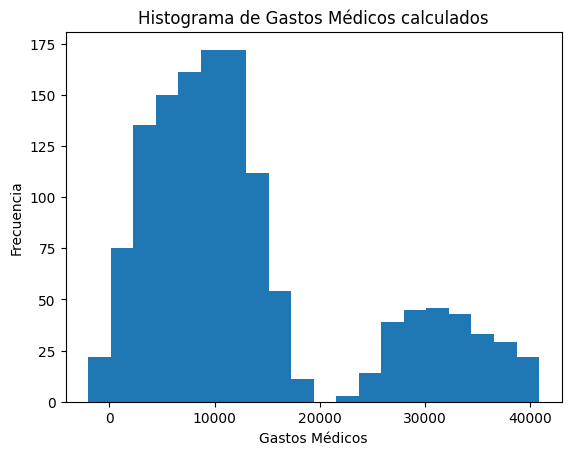

In [23]:
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

# Cargar los datos
datos = pd.read_csv("./src/datos_.csv")

# Convertir variables categóricas a numéricas
datos = pd.get_dummies(datos, columns=["sex", "smoker", "region"], drop_first=True)

# Crear el modelo lineal
modelo = sm.ols(
    "expenses ~ age + sex_male + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest",
    data=datos,
).fit()


# Función para predecir los gastos médicos
def predecir_gastos(
    age,
    sex_male,
    bmi,
    children,
    smoker_yes,
    region_northwest,
    region_southeast,
    region_southwest,
):

    # Crear un diccionario con los valores de las variables predictoras
    variables = {
        "age": age,
        "sex_male": sex_male,
        "bmi": bmi,
        "children": children,
        "smoker_yes": smoker_yes,
        "region_northwest": region_northwest,
        "region_southeast": region_southeast,
        "region_southwest": region_southwest,
    }
    # Crear un DataFrame con los valores de las variables predictoras
    df_prediccion = pd.DataFrame([variables])
    # Realizar la predicción utilizando el modelo
    prediccion = modelo.predict(df_prediccion)

    return prediccion[0]


# Ejemplo de uso de la función
gastos_predichos = predecir_gastos(
    age=30,
    sex_male=1,
    bmi=25,
    children=2,
    smoker_yes=0,
    region_northwest=0,
    region_southeast=1,
    region_southwest=0,
)

print(f"Gastos médicos calculados: {gastos_predichos}\n")

predicciones = modelo.predict(
    datos
)  # Obtener predicciones para todo el conjunto de datos

# Crear histograma de las predicciones
plt.hist(predicciones, bins=20)
plt.xlabel("Gastos Médicos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Gastos Médicos calculados")
plt.show()

## 6. Contraste la hipótesis $H_0: \beta_i=0$ vs $H_1: \beta_i\neq 0$. Donde son los coeficientes del modelo.

In [24]:
import pandas as pd
import statsmodels.formula.api as sm
from tabulate import tabulate

# Cargar los datos
datos = pd.read_csv("./src/datos_.csv")

# Convertir variables categóricas a numéricas usando one-hot encoding
datos = pd.get_dummies(datos, columns=["sex", "smoker", "region"], drop_first=True)

# Crear el modelo lineal
modelo = sm.ols(
    "expenses ~ age + sex_male + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest",
    data=datos,
).fit()

# Nivel de significancia
nivel_significancia = 0.05

# Obtener la tabla de resultados del modelo
resultados = modelo.summary2().tables[1]

# Personalizar la columna "Rechazar H0"
resultados["Rechazar H0"] = resultados.apply(
    lambda fila: (
        f"Se rechaza H0 porque p ({fila['P>|t|']:.3f}) < {nivel_significancia}"
        if fila["P>|t|"] < nivel_significancia
        else f"No se rechaza H0 porque p ({fila['P>|t|']:.3f}) >= {nivel_significancia}"
    ),
    axis=1,
)

# Formatear los resultados como una lista ordenada
headers = [" ", "Coef.", "Std.Err.", "t", "P>|t|", "[0.025", "0.975]", "Rechazar H0"]
tabla_formateada = tabulate(resultados, headers=headers, tablefmt="plain")

# Imprimir los resultados con el título "Resultados"
print("\nResultados:\n")
print(tabla_formateada)


Resultados:

                               Coef.    Std.Err.           t        P>|t|      [0.025       0.975]  Rechazar H0
Intercept                 -11941.6      987.811   -12.0889    5.38928e-32  -13879.4    -10003.7     Se rechaza H0 porque p (0.000) < 0.05
sex_male[T.True]            -131.352    332.935    -0.394527  0.693255       -784.488     521.784   No se rechaza H0 porque p (0.693) >= 0.05
smoker_yes[T.True]         23847.5      413.139    57.7226    0             23037       24658       Se rechaza H0 porque p (0.000) < 0.05
region_northwest[T.True]    -352.79     476.261    -0.740749  0.458976      -1287.1       581.515   No se rechaza H0 porque p (0.459) >= 0.05
region_southeast[T.True]   -1035.6      478.681    -2.16344   0.0306853     -1974.65      -96.5436  Se rechaza H0 porque p (0.031) < 0.05
region_southwest[T.True]    -959.306    477.912    -2.00729   0.0449214     -1896.85      -21.7617  Se rechaza H0 porque p (0.045) < 0.05
age                          256.839  

## 7. Calcule el coeficiente de determinación.

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("./src/datos_.csv")
le = LabelEncoder()

data["sex_aux"] = le.fit_transform(data["sex"])
data["smoker_aux"] = le.fit_transform(data["smoker"])
data["region_aux"] = le.fit_transform(data["region"])


X = data[["age", "sex_aux", "bmi", "children", "smoker_aux", "region_aux"]]
y = data["expenses"]

model = LinearRegression()
model.fit(X, y)

r_squared = model.score(X, y)

print("Coeficiente de determinación:", r_squared)

Coeficiente de determinación: 0.7507516902763371


## 8. Realice un análisis de los residuos.

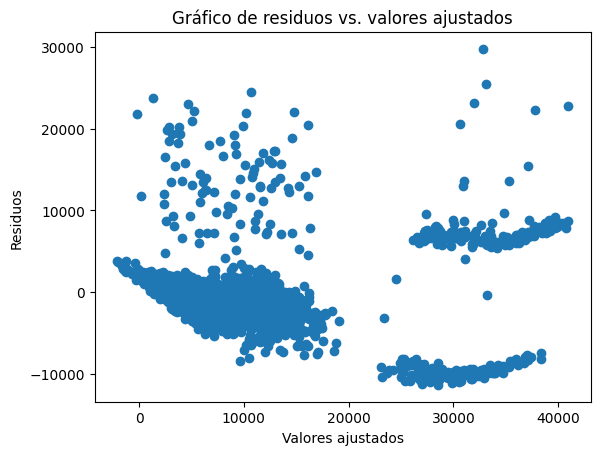

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv("./src/datos_.csv")
le = LabelEncoder()

data["sex_aux"] = le.fit_transform(data["sex"])
data["smoker_aux"] = le.fit_transform(data["smoker"])
data["region_aux"] = le.fit_transform(data["region"])

X = data[["age", "sex_aux", "bmi", "children", "smoker_aux", "region_aux"]]
y = data["expenses"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos vs. valores ajustados")
plt.show()

## 9. Incluya una nueva variable al modelo, la interacción entre las variables Fumador y BMI. Calcule el coeficiente de determinación para este modelo. Explique los resultados obtenidos.

In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("./src/datos_.csv")
le = LabelEncoder()

data["sex_aux"] = le.fit_transform(data["sex"])
data["smoker_aux"] = le.fit_transform(data["smoker"])
data["region_aux"] = le.fit_transform(data["region"])
data["smoker_bmi"] = data["smoker_aux"] * data["bmi"]

X = data[
    ["age", "sex_aux", "bmi", "children", "smoker_aux", "region_aux", "smoker_bmi"]
]
y = data["expenses"]

model = LinearRegression()

model.fit(X, y)

r_squared = model.score(X, y)
print("Coeficiente de determinación con interacción:", r_squared)

Coeficiente de determinación con interacción: 0.840811288288523
